In [7]:
import tensorflow as tf
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# 指定GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score,precision_score,accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns 

import pandas as pd

from sklearn import svm

import datetime

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

Using TensorFlow backend.


In [9]:
starttime = datetime.datetime.now()

In [10]:
import re
import numpy as np
chn_pattern ="[\u4e00-\u9fa5]+"
regex_chn = re.compile(chn_pattern)

In [11]:
c_path = './data/email_2017.txt'
b_path = './data/fake_email.txt'
# unknown_path = './data/email_2017.txt'
stop_words_path = './data/stopwords.txt'

In [12]:
def load_stop_words():
    stop_words_vec = []
    with open(stop_words_path,'r') as f:
        for line in f.readlines():
            stop_words_vec.append(line.strip('\n'))
    return stop_words_vec

In [13]:
def parser(path,security_group):
    line_vec = [];group=[]
    with open(path,'r',encoding='utf8') as f:
        f = f.readlines()
        for line in f:
            tmp = regex_chn.findall(line)
            if not tmp:
                continue
            line_vec.append(tmp)
            group.append(security_group)
    return np.asarray(line_vec),group    

def parser(path,security_group):
    line_vec = [];group=[]
    with open(path,'r',encoding='utf8') as f:
        f = f.readlines()
        for line in f:
            tmp = regex_chn.findall(line)
            if not tmp:
                continue
            line_vec.append(tmp)
            group.append(security_group)
    return np.asarray(line_vec),group    

In [14]:
c_vec,c_group = parser(c_path,'C')
b_vec,b_group = parser(b_path,'B')
# unknown_vec,_= parser(unknown_path,'-')
stop_words_vec = load_stop_words()

In [15]:
all_vec = np.r_[c_vec,b_vec]
j = 1
# for content in all_vec :
#     print('Index:{}  Content:{}'.format(j,content))
#     j = j+1

In [16]:
# b_vec_index = list(range(0,c_vec.shape[0]))
# c_vec_index = list(range(c_vec.shape[0],c_vec.shape[0]+b_vec.shape[0]))
# unknown_vec_index = list(range(c_vec.shape[0]+b_vec.shape[0],c_vec.shape[0]+b_vec.shape[0]+unknown_vec.shape[0]))

# 分群 kmeans Clustering

In [17]:
new_vec = []
for item in all_vec:
    string = " ".join(item)
    new_vec.append(string)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_vec)

X = X.toarray()

#kmeans Clustering

# kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
# labels = kmeans.predict(X)
# print(len(labels))

# i = 1

# for L in labels:     # 第一个实例
#     print('Index:{}  Lebal:{}'.format(i,L))
#     i = i+1


# 分群 Hierarchical Clustering

In [ ]:
# Hierarchical Clustering
hclust = AgglomerativeClustering(linkage = 'complete', affinity = 'euclidean', n_clusters = 27)

# 印出分群結果
hclust.fit(X)
cluster_labels = hclust.labels_

# i = 1

# for L in cluster_labels:     # 第一个实例
#     print('Index:{}  Lebal:{}'.format(i,L))
#     i = i+1

# print('------------------------------')
# #securityB
adj_lebels = np.array(cluster_labels)


adj_lebels[adj_lebels == 4] = 99
adj_lebels[adj_lebels == 5] = 99
adj_lebels[adj_lebels == 8] = 99
adj_lebels[adj_lebels == 12] = 99
adj_lebels[adj_lebels == 14] = 99
adj_lebels[adj_lebels == 15] = 99
adj_lebels[adj_lebels == 16] = 99
adj_lebels[adj_lebels == 18] = 99
adj_lebels[adj_lebels == 21] = 99
adj_lebels[adj_lebels == 23] = 99

#securityC
adj_lebels[adj_lebels == 0] = 88
adj_lebels[adj_lebels == 1] = 88
adj_lebels[adj_lebels == 2] = 88
adj_lebels[adj_lebels == 3] = 88
adj_lebels[adj_lebels == 6] = 88
adj_lebels[adj_lebels == 7] = 88
adj_lebels[adj_lebels == 9] = 88
adj_lebels[adj_lebels == 10] = 88
adj_lebels[adj_lebels == 11] = 88
adj_lebels[adj_lebels == 13] = 88
adj_lebels[adj_lebels == 17] = 88
adj_lebels[adj_lebels == 19] = 88
adj_lebels[adj_lebels == 20] = 88
adj_lebels[adj_lebels == 22] = 88
adj_lebels[adj_lebels == 24] = 88
adj_lebels[adj_lebels == 25] = 88
adj_lebels[adj_lebels == 26] = 88

# Security B
adj_lebels[adj_lebels == 99] = 1
# SecurityC
adj_lebels[adj_lebels == 88] = 0

# i = 1
# b = 0
# c = 0
# for L in adj_lebels:     # 第一个实例
#     print('Index:{}  Lebal:{}'.format(i,L))
#     if L == 1 :
#         b = b + 1
#     else :
#         c = c + 1
#     i = i + 1
    
# print('b => {}, c => {}'.format(b,c))


# 分類

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, adj_lebels, test_size=0.2)

# LSTM

In [20]:
# max_features = 2048
# batch_size = 40

# model = Sequential()

# #堆疊model
# model.add(Embedding(max_features, output_dim=256))
# model.add(LSTM(128))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=2)


# ROC Curve

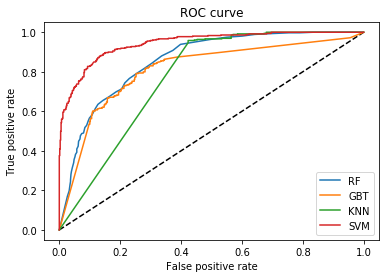

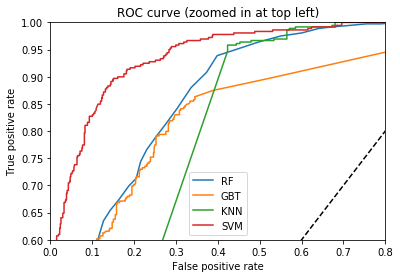

In [22]:
n_estimator = 50
#Randon forest
rf = RandomForestClassifier(max_depth=None, n_estimators=n_estimator, max_features='auto')
rf = rf.fit(X_train,y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

#GBDT
gbdt = GradientBoostingClassifier(max_depth=None, n_estimators=n_estimator, max_features='auto')
gbdt = gbdt.fit(X_train,y_train)
y_pred_gbdt = gbdt.predict_proba(X_test)[:, 1]
fpr_gbdt, tpr_gbdt, _ = roc_curve(y_test, y_pred_gbdt)

# The random forest model by itself
#KNN
knn = KNeighborsClassifier(n_neighbors=5, weights= 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

#LSTM
# fpr_lstm, tpr_lstm, _ = roc_curve(y_test,lstm_pred_prob)

#SVM
svc = svm.SVC(C=5.0, kernel='rbf', gamma=0.3, probability=True)
svc_fit = svc.fit(X_train, y_train)
y_pred_svm = svc.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBT')
plt.plot(fpr_knn, tpr_knn, label='KNN')
# plt.plot(fpr_lstm, tpr_lstm, label='LSTM')
plt.plot(fpr_svm, tpr_svm, label='SVM')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.8)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBT')
plt.plot(fpr_knn, tpr_knn, label='KNN')
# plt.plot(fpr_lstm, tpr_lstm, label='LSTM')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# precision and recall score

In [ ]:
y_pred_rf_binary = rf.predict(X_test)
y_pred_gbdt_binary = gbdt.predict(X_test)
y_pred_knn_binary = knn.predict(X_test)
# y_pred_lstm_binary = lstm_pred_binary
y_pred_gbdt_binary = gbdt.predict(X_test)
y_pred_svm_binary = svc.predict(X_test)




In [ ]:
# lstm_pred_binary_ =[]
# for item in lstm_pred_binary:
#     if item>=0.5:
#         lstm_pred_binary_.append(1)
#     else:
#         lstm_pred_binary_.append(0)
# lstm_precision = precision_score(y_test, lstm_pred_binary_)
# lstm_recall = recall_score(y_test, lstm_pred_binary_)

knn_precision = precision_score(y_test,y_pred_knn_binary)
knn_recall = recall_score(y_test,y_pred_knn_binary)

gbdt_precision  = precision_score(y_test,y_pred_gbdt_binary)
gbdt_recall = recall_score(y_test,y_pred_gbdt_binary)

rf_precision = precision_score(y_test, y_pred_rf_binary)
rf_recall = recall_score(y_test, y_pred_rf_binary)

svm_precision = precision_score(y_test, y_pred_svm_binary)
svm_recall = recall_score(y_test, y_pred_svm_binary)


 
 
print('RandomFirest precision score is {}, recall score is {}'.format(rf_precision,rf_recall))
print('GBDT precision score is {}, recall score is {}'.format(gbdt_precision,gbdt_recall))
print('KNN precision score is {}, recall score is {}'.format(knn_precision,knn_recall))
# print('lstm precision score is {}, recall score is {}'.format(lstm_precision,lstm_recall))
print('SVM precision score is {}, recall score is {}'.format(svm_precision,svm_recall))
print('-----------------------------------------------------')

knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn_binary,labels=[1,0])
gbdt_confusion_matrix = confusion_matrix(y_test, y_pred_gbdt_binary,labels=[1,0])
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf_binary,labels=[1,0])
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm_binary,labels=[1,0])
# lstm_confusion_matrix = confusion_matrix(y_test, lstm_pred_binary_,labels=[1,0])

print(rf_confusion_matrix)
print(gbdt_confusion_matrix)
print(knn_confusion_matrix)
# print(lstm_confusion_matrix)
print(svm_confusion_matrix)


In [ ]:
endtime = datetime.datetime.now()
print ((endtime - starttime).seconds)

In [ ]:
log = open('./data/log.txt', 'a')

log.write('RandomFirest precision score is {}, recall score is {} \n'.format(rf_precision,rf_recall))
log.write('GBDT precision score is {}, recall score is {} \n'.format(gbdt_precision,gbdt_recall))
log.write('KNN precision score is {}, recall score is {} \n'.format(knn_precision,knn_recall))
log.write('LSTM precision score is {}, recall score is {} \n'.format(lstm_precision,lstm_recall))
log.write('SVM precision score is {}, recall score is {} \n'.format(svm_precision,svm_recall))

log.write(str(rf_confusion_matrix)+'\n')
log.write(str(gbdt_confusion_matrix)+'\n')
log.write(str(knn_confusion_matrix)+'\n')
log.write(str(lstm_confusion_matrix)+'\n')
log.write(str(svm_confusion_matrix)+'\n')

log.write('-----------{}-----------\n'.format(datetime.datetime.now()))
log.close()